<a href="https://colab.research.google.com/github/JEEVA-JOSLIN/Identification-of-different-medicinal-leaves-and-raw-materials/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


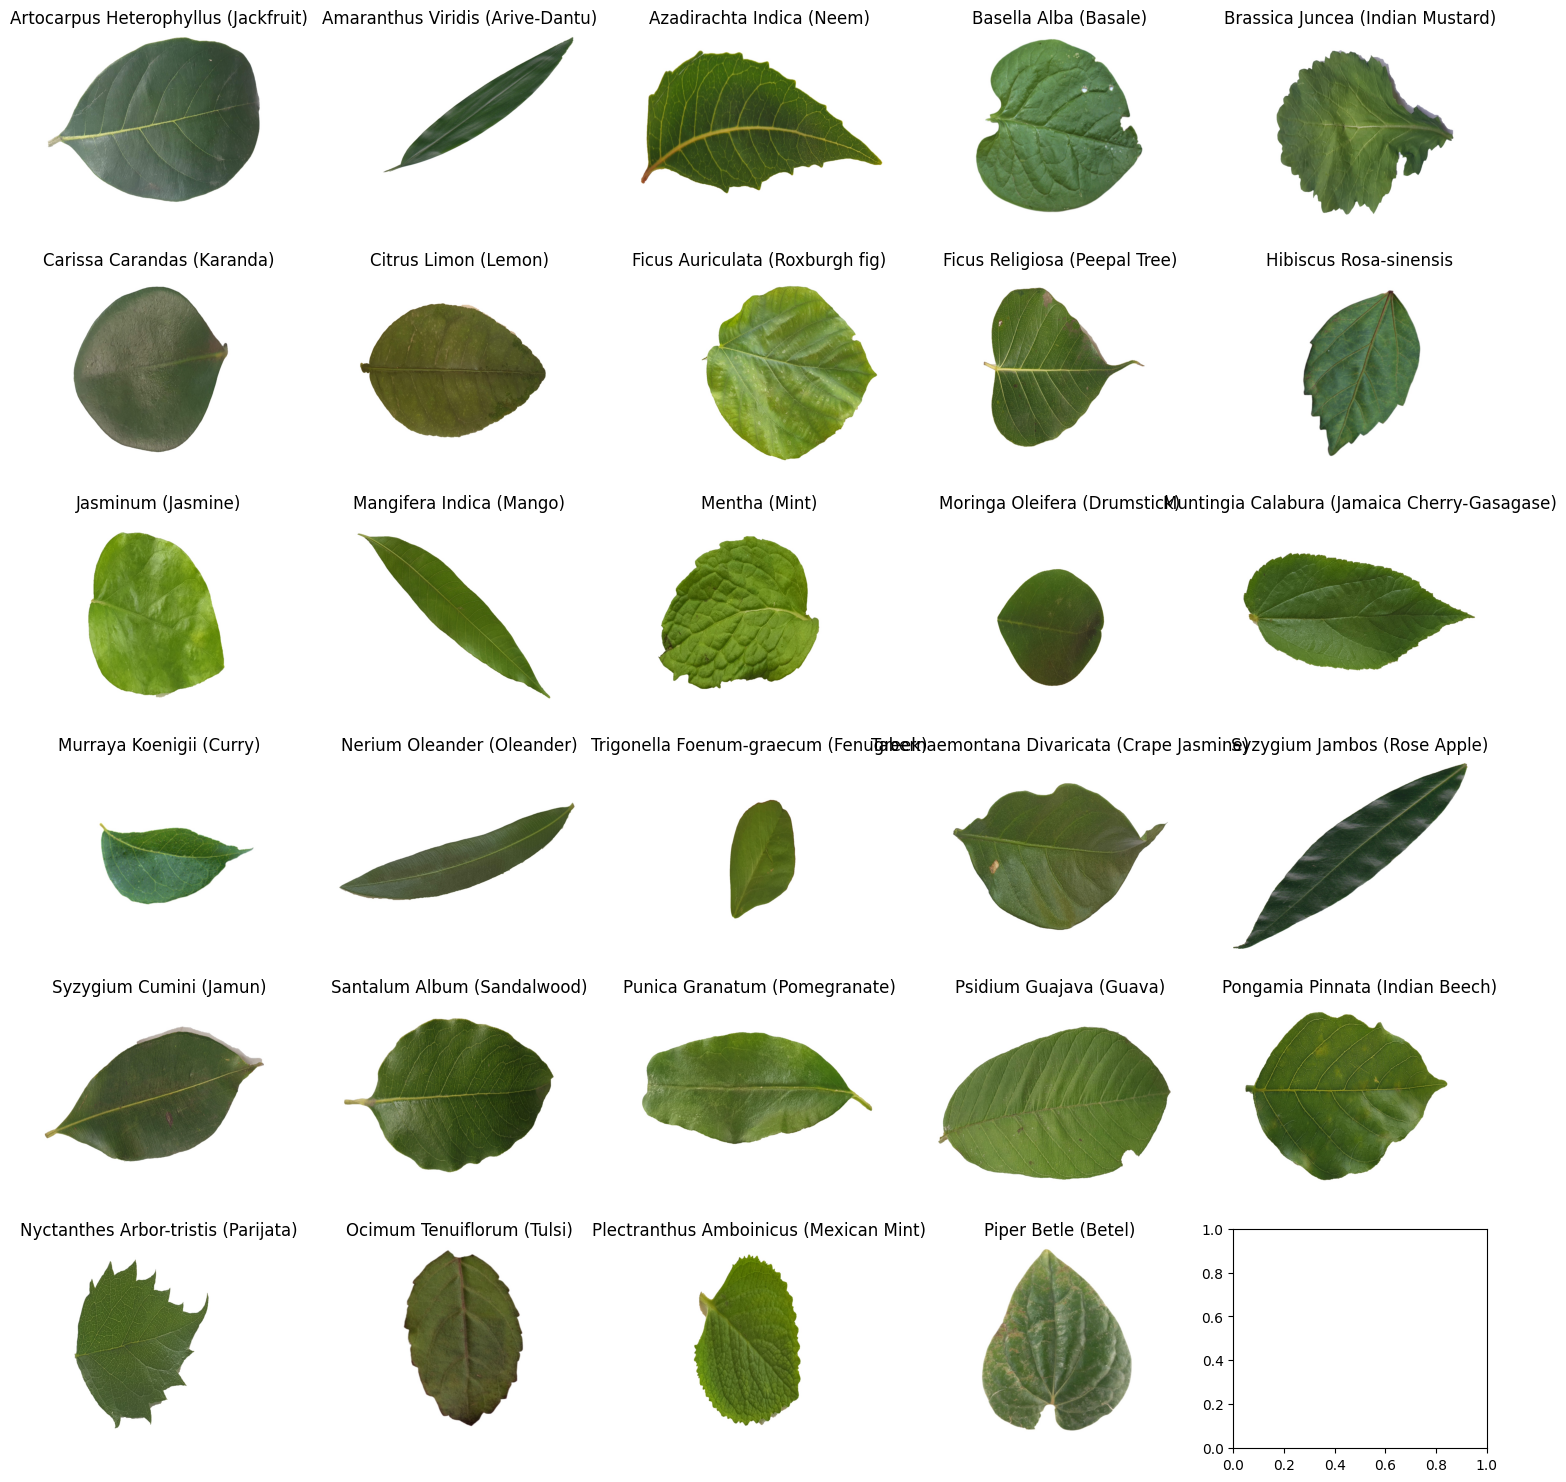

Found 1387 images belonging to 29 classes.
Found 326 images belonging to 29 classes.


Epoch 1/10
43/43 [==============================] - 129s 3s/step - loss: 1.8169 - accuracy: 0.5077 - val_loss: 0.5948 - val_accuracy: 0.8875
Epoch 2/10
43/43 [==============================] - 142s 3s/step - loss: 0.6176 - accuracy: 0.8221 - val_loss: 0.3262 - val_accuracy: 0.9125
Epoch 3/10
43/43 [==============================] - 138s 3s/step - loss: 0.4447 - accuracy: 0.8745 - val_loss: 0.2986 - val_accuracy: 0.9219
Epoch 4/10
43/43 [==============================] - 129s 3s/step - loss: 0.3156 - accuracy: 0.8952 - val_loss: 0.3234 - val_accuracy: 0.8844
Epoch 5/10
43/43 [==============================] - 109s 3s/step - loss: 0.2820 - accuracy: 0.9048 - val_loss: 0.2683 - val_accuracy: 0.9250
Epoch 6/10
43/43 [==============================] - 111s 3s/step - loss: 0.2337 - accuracy: 0.9203 - val_loss: 0.2105 - val_accuracy: 0.9250
Epoch 7/10
43/43 [==============================] - 106s 2s/step - loss: 0.2222 - accuracy: 0.9240 - val_loss: 0.1617 - val_accuracy: 0.9438
Epoch 8/10
43

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from google.colab import drive
drive.mount('/content/gdrive')
main_data_dir = '/content/gdrive/MyDrive/Segmented Medicinal Leaf Images'
batch_size = 32
num_classes = len(os.listdir(main_data_dir))
epochs = 10
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
class_folders = os.listdir(main_data_dir)
# Set the number of images per row
images_per_row = 5

# Calculate the number of rows needed
num_rows = math.ceil(len(class_folders) / images_per_row)

# Create a grid of subplots
fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 15))

# Display images in rows with titles
for i, class_folder in enumerate(class_folders):
    # Get the first image file in the class folder
    class_folder_path = os.path.join(main_data_dir, class_folder)
    image_files = [f for f in os.listdir(class_folder_path) if f.endswith('.jpg')]
    if image_files:
        first_image_path = os.path.join(class_folder_path, image_files[0])

        # Load the image
        img = mpimg.imread(first_image_path)

        # Calculate the row and column indices for the subplot
        row = i // images_per_row
        col = i % images_per_row

        # Display the image in the corresponding subplot
        axs[row, col].imshow(img)
        axs[row, col].set_title(class_folder)
        axs[row, col].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
split_ratio = 0.8

# Create ImageDataGenerator with data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=1 - split_ratio  # Set validation split
)
train_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

# Load and preprocess validation data using the generator
validation_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

#/content/gdrive/MyDrive
model.save('/content/gdrive/MyDrive/final.h5')
label_mapping = {i: label for i, label in enumerate(sorted(os.listdir(main_data_dir)))}

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


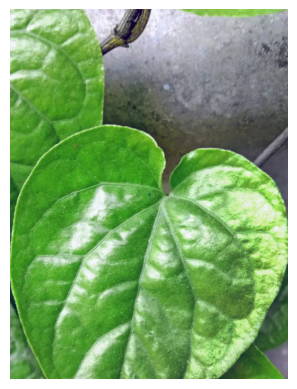

1/1 [==============================] - 1s 1s/step
Predicted Label: Piper Betle (Betel)
Confidence: 0.37


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
image_path='/content/gdrive/MyDrive/bb.webp'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/plant_identification_model2.h5')

# Load and preprocess the image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_plant(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)

    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]

    return predicted_label, confidence

# Provide the path to the image you want to classify
predicted_label, confidence = predict_plant(image_path, label_mapping)

# Print the prediction
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


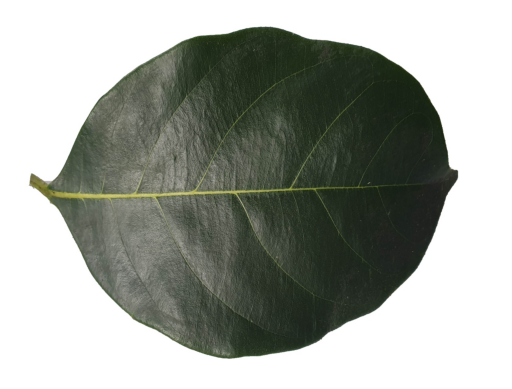

1/1 [==============================] - 1s 995ms/step
Predicted Label: Artocarpus Heterophyllus (Jackfruit)
Confidence: 1.00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
image_path='/content/AH-S-001.jpg'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/plant_identification_model2.h5')

# Load and preprocess the image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_plant(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)

    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]

    return predicted_label, confidence

# Provide the path to the image you want to classify
predicted_label, confidence = predict_plant(image_path, label_mapping)

# Print the prediction
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


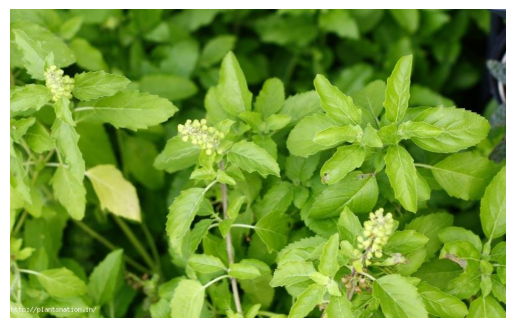

1/1 [==============================] - 1s 1s/step
Predicted Label: Hibiscus Rosa-sinensis
Confidence: 0.52


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
image_path='/content/gdrive/MyDrive/tulasi.jpeg'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/plant_identification_model2.h5')

# Load and preprocess the image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_plant(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)

    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]

    return predicted_label, confidence

# Provide the path to the image you want to classify
predicted_label, confidence = predict_plant(image_path, label_mapping)

# Print the prediction
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


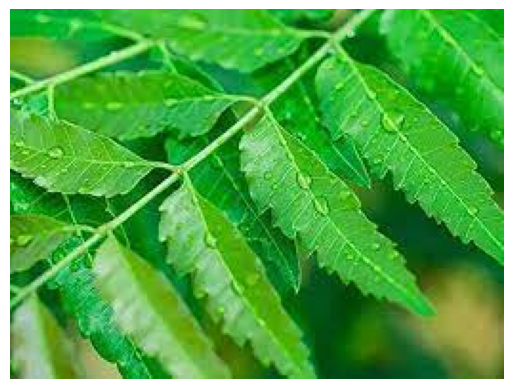

1/1 [==============================] - 1s 1s/step
Predicted Label: Azadirachta Indica (Neem)
Confidence: 0.99


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
image_path='/content/gdrive/MyDrive/neem.jpeg'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/plant_identification_model2.h5')

# Load and preprocess the image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_plant(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)

    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]

    return predicted_label, confidence

# Provide the path to the image you want to classify
predicted_label, confidence = predict_plant(image_path, label_mapping)

# Print the prediction
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[[[ 60 115]]

 [[ 61 116]]

 [[ 59 118]]

 ...

 [[ 64 117]]

 [[ 63 116]]

 [[ 61 116]]]


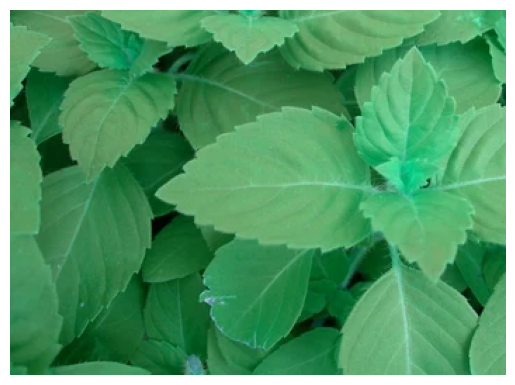

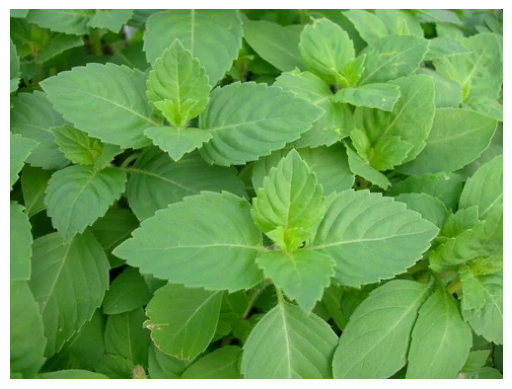

1/1 [==============================] - 1s 1s/step
Predicted Label: Mentha (Mint)
Confidence: 0.39


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
drive.mount('/content/gdrive')
image_path='/content/gdrive/MyDrive/tulasi.webp'
# Load the image of the group of leaves
image = cv2.imread(image_path)

# Segment the image to identify the individual leaves
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# Select the single leaf that you want to extract
leaf_contour = max(contours, key=cv2.contourArea)
print(leaf_contour)
# Crop the image to extract the single leaf
x, y, w, h = cv2.boundingRect(leaf_contour)
single_leaf_image = image[y:y + h, x:x + w]

# Display the extracted single leaf image
plt.imshow(single_leaf_image)


plt.axis('off')  # Turn off axis labels and ticks
plt.show()

img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/plant_identification_model2.h5')

# Load and preprocess the image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_plant(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)

    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]

    return predicted_label, confidence

# Provide the path to the image you want to classify
predicted_label, confidence = predict_plant(image_path, label_mapping)

# Print the prediction
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

In [ ]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/gdrive')
image_path='/content/gdrive/MyDrive/tulasi.webp'
# Load the image of the group of leaves
image = cv2.imread(image_path)
# Load the pre-trained Mask R-CNN model
model = tf.keras.models.load_model("mask_rcnn_leaf_segmentation.h5")

# Load the image of the group of leaves
image = tf.keras.preprocessing.image_dataset_from_directory(
    "group_of_leaves", label_mode=None, image_size=(256, 256)
).as_numpy_iterator().next()

# Make a prediction using the model
predictions = model.predict(image)

# Get the bounding box for the single leaf
bounding_box = predictions["boxes"][0]

# Crop the image to extract the single leaf
single_leaf_image = image[
    int(bounding_box[0]): int(bounding_box[2]), int(bounding_box[1]): int(bounding_box[3])
]

# Display the extracted single leaf image
cv2.imshow("Extracted Single Leaf", single_leaf_image)
cv2.waitKey(0)


Mounted at /content/gdrive


OSError: ignored